**DATA ANALYSIS PROJECT: UDACITY'S STUDENTS ENGAGEMENT**

In [1]:
import os
from datetime import datetime as dt
import json
import unicodecsv
import seaborn as sns 
import matplotlib.pyplot as plt

**PREVIOUS ETL PROCESS**

reading csv files

In [2]:
with open('enrollments.csv', 'rb') as f:
    reader = unicodecsv.DictReader(f)
    enrollments = list(reader)

In [3]:
enrollment_num_rows = len(enrollments)
print(enrollment_num_rows)

1640


In [4]:
with open('project_submissions.csv', 'rb') as f:
    reader = unicodecsv.DictReader(f)
    project_submissions = list(reader)

project_submissions[0]

{'creation_date': '2015-01-14',
 'completion_date': '2015-01-16',
 'assigned_rating': 'UNGRADED',
 'account_key': '256',
 'lesson_key': '3176718735',
 'processing_state': 'EVALUATED'}

In [5]:
with open('daily_engagement.csv', 'rb') as f:
    reader = unicodecsv.DictReader(f)
    daily_engagement = list(reader)

daily_engagement[0]

{'acct': '0',
 'utc_date': '2015-01-09',
 'num_courses_visited': '1.0',
 'total_minutes_visited': '11.6793745',
 'lessons_completed': '0.0',
 'projects_completed': '0.0'}

In [6]:
with open('daily_engagement_full.csv', 'rb') as f:
    reader = unicodecsv.DictReader(f)
    daily_engagement_full = list(reader)

daily_engagement_full[0]

{'utc_date': '2014-11-05',
 'acct': '448',
 'registration_date': '2014-08-05',
 'subscription_start': '2014-11-05',
 'course_key': 'ud359-nd',
 'sibling_key': 'ud359',
 'course_title': 'Intro to Data Science',
 'has_visited': '0.0',
 'total_minutes_visited': '0.0',
 'lessons_completed': '0.0',
 'projects_completed': '0.0',
 'account_key': '2257038596'}

**DATA WRANGLING PHASE**

as we can see, all the data was read as string. The first step is fixing data types

In [7]:
#function to convert a date stored as string to a datetime object

def parse_date(date):
    if date == '':
        return None
    else:
        return dt.strptime(date, '%Y-%m-%d')

In [8]:
# function to take null values stored as integer and conver it into int or none

def parse_maybe_int(i):
    if i == '':
        return None
    else:
        return int(i)

In [9]:
#applying the functions to the files (dictionaries)

#converting the string enrollments into a list of dictionaries

#enrollments_list = json.loads(enrollments)

for enrollment in enrollments:
    enrollment['cancel_date'] = parse_date(enrollment['cancel_date'])
    enrollment['days_to_cancel'] = parse_maybe_int(enrollment['days_to_cancel'])
    enrollment['is_canceled'] = enrollment['is_canceled'] == 'True'
    enrollment['is_udacity'] = enrollment['is_udacity'] == 'True'
    enrollment['join_date'] = parse_date(enrollment['join_date'])    

In [10]:
enrollments[0]

{'account_key': '448',
 'status': 'canceled',
 'join_date': datetime.datetime(2014, 11, 10, 0, 0),
 'cancel_date': datetime.datetime(2015, 1, 14, 0, 0),
 'days_to_cancel': 65,
 'is_udacity': True,
 'is_canceled': True}

so, in the transformation of enrollments dataset the account key as integer type, change days to cancel as integer, join date and cancel date as datetime 

In [11]:
for engagement in daily_engagement:
    engagement['lessons_completed'] = int(float(engagement['lessons_completed']))
    engagement['num_courses_visited'] = int(float(engagement['num_courses_visited']))
    engagement['projects_completed'] = int(float(engagement['projects_completed']))
    engagement['total_minutes_visited'] = float(engagement['total_minutes_visited'])
    engagement['utc_date'] = parse_date(engagement['utc_date'])

daily_engagement[0]

{'acct': '0',
 'utc_date': datetime.datetime(2015, 1, 9, 0, 0),
 'num_courses_visited': 1,
 'total_minutes_visited': 11.6793745,
 'lessons_completed': 0,
 'projects_completed': 0}

at the transformation of daily engagement, it was converted to integer the columns lessons visited, num courses visited, projects, converted to float the column total minutes visited and converted to date with the previous function the utc date

In [12]:
for submission in project_submissions:
    submission['completion_date'] = parse_date(submission['completion_date'])
    submission['creation_date'] = parse_date(submission['creation_date'])

project_submissions[0]

{'creation_date': datetime.datetime(2015, 1, 14, 0, 0),
 'completion_date': datetime.datetime(2015, 1, 16, 0, 0),
 'assigned_rating': 'UNGRADED',
 'account_key': '256',
 'lesson_key': '3176718735',
 'processing_state': 'EVALUATED'}

in project_submissions it was only necessary to transform date columns, creation date and competition_date, to datetipe

**QUESTION PHASE**

How long it usually take to students before the submit of projects?

How do students who pass their projects differ from those who don't?

Students who concluse their projects were assigned in other? how many projects?

**INVESTIGATING THE DATA**

In [13]:
enrollment_num_rows = len(enrollments)
print(enrollment_num_rows)

1640


In [14]:
enrollment_set = {enrollment['account_key'] for enrollment in enrollments}
enrollment_num_unique_students = len(enrollment_set)
print (enrollment_num_unique_students)

1302


In [15]:
engagement_num_rows = len(daily_engagement)
print(engagement_num_rows)

136240


In [16]:
engagement_set = {engagement['acct'] for engagement in daily_engagement}
engagement_num_unique_students = len(engagement_set)
print(engagement_num_unique_students)

1237


In [17]:
submissions_num_rows = len(project_submissions)
print(submissions_num_rows)

3642


In [18]:
submission_set = {submission['account_key'] for submission in project_submissions}
submission_num_unique_students = len(submission_set)
print(submission_num_unique_students)


743


There are some problems with these numbers.

There are another problem but easy to fix, the account key and acct means the same so I'll use the same name for both columns

In [19]:
for engagement_record in daily_engagement:
    engagement_record['account_key'] = engagement_record['acct']
    del[engagement_record['acct']]

In [20]:
daily_engagement[0]['account_key']

'0'

There are more unique students in enrollment (1302) than engagement table (1237).

The output reflects a problem with the real engagement of Udacity courses or a problem with data threatment so far?

Let's find any enrollment record with no correspondency engagement data

In [21]:
unique_enrolled = set()
for enrollment in enrollments:
    unique_enrolled.add(enrollment['account_key'])
len(unique_enrolled)

1302

In [22]:
unique_engagement = set()
for engagement_record in daily_engagement:
    unique_engagement.add(engagement_record['account_key'])
len(unique_engagement)

1237

In [23]:
for enrollment in enrollments:
    student = enrollment['account_key']
    if student not in unique_engagement:
        print(enrollment)
        break

{'account_key': '1219', 'status': 'canceled', 'join_date': datetime.datetime(2014, 11, 12, 0, 0), 'cancel_date': datetime.datetime(2014, 11, 12, 0, 0), 'days_to_cancel': 0, 'is_udacity': False, 'is_canceled': True}


it seems the records that are missing in engagement table is explained because there are some "trial" period when the student sign up for a course but cancel it at the same day, so it won't be record as engagement.

In [24]:
total = 0 

for enrollment in enrollments:
    student = enrollment['account_key']
    if student not in unique_engagement and enrollment['join_date'] != enrollment['cancel_date']:
        total += 1
print(enrollment)

{'account_key': '686', 'status': 'current', 'join_date': datetime.datetime(2015, 8, 23, 0, 0), 'cancel_date': None, 'days_to_cancel': None, 'is_udacity': False, 'is_canceled': False}


function to remove test udacity accounts 

In [25]:
udacity_test_accounts = set ()
for e in enrollments:
    if e['is_udacity']:
        udacity_test_accounts.add(e['account_key'])
len(udacity_test_accounts)

6

In [26]:
def remove_tests_accounts(data):
    non_udacity = []
    for data_point in data:
        if data_point['account_key'] not in udacity_test_accounts:
            non_udacity.append(data_point)
    return non_udacity

In [27]:
non_udacity_enrollments = remove_tests_accounts(enrollments)
print(len(non_udacity_enrollments))
non_udacity_engagement = remove_tests_accounts(daily_engagement)
print(len(daily_engagement))
non_udacity_submissions = remove_tests_accounts(project_submissions)
print(len(non_udacity_submissions))

1622
136240
3634


Moving on from the wrangling phase to the exploration phase. 
Still on the question **"how do numbers in the daily engagement table differ for students who pass the first project?"**

The engagement data provides content about students that submits projects in different lenghts of time, or engagement in courses that are not related to the first project.

Due to, I'll restrict the analysis for the group of first, excluding the ones who cancelled within a week the projects.


In [28]:
paid_students = {}
for e in non_udacity_enrollments:
    if not e['is_canceled'] or e['days_to_cancel'] > 7:
        account_key = e['account_key']
        enrollment_date = e['join_date']
        
        if account_key not in paid_students or enrollment_date > paid_students[account_key]:
            paid_students[account_key] = enrollment_date

len(paid_students)

995

In [29]:
#print(paid_students)

the next step is getting data from the paid students in the first week

In [30]:
def within_one_week(join_date, engagement_date):
    time_delta = engagement_date - join_date
    return time_delta.days < 7 and time_delta.days >= 0

In [31]:
def remove_free_trial_cancels(data):
    new_data = []
    for data_point in data:
        if data_point['account_key'] in paid_students:
            new_data.append(data_point)
    return new_data

paid_enrollments = remove_free_trial_cancels(non_udacity_enrollments)
paid_engagement = remove_free_trial_cancels(non_udacity_engagement)
paid_submissions = remove_free_trial_cancels(non_udacity_submissions)

print('Paid enrollments:')
print(len(paid_enrollments))
print('Paid engagements:')
print(len(paid_engagement))
print('Paid submissions:')
print(len(paid_submissions))

#flag to identify students who visited each course
for engagement_record in paid_engagement:
    if engagement_record['num_courses_visited'] > 0:
        engagement_record['has_visited'] = 1
    else:
        engagement_record['has_visited'] = 0

paid_engagement_in_first_week = []
for engagement_record in paid_engagement:
    account_key = engagement_record['account_key']
    join_date = paid_students[account_key]
    engagement_record_date = engagement_record['utc_date']

    if within_one_week(join_date, engagement_record_date):
        paid_engagement_in_first_week.append(engagement_record)

print('Paid engagements in first week:')
print(len(paid_engagement_in_first_week))

Paid enrollments:
1293
Paid engagements:
134549
Paid submissions:
3618
Paid engagements in first week:
6919


**EXPLORE PHASE: Exploring student engagement**

In [32]:
from collections import defaultdict

# Creates a dictionary of engagement grouped by student

engagement_by_account = defaultdict(list)
for engagement_record in paid_engagement_in_first_week:
    account_key = engagement_record['account_key']
    engagement_by_account[account_key].append(engagement_record)

In [33]:
# Creates a dictionary with the total minutes each student spent in the classroom during the first week

total_minutes_by_account = {}
for account_key, engagement_for_student in engagement_by_account.items():
    total_minutes = 0
    for engagement_record in engagement_for_student:
        total_minutes += engagement_record['total_minutes_visited']
    total_minutes_by_account[account_key] = total_minutes

In [34]:
import numpy as np

total_minutes = np.array(list(total_minutes_by_account.values())) #convert the values of dict in a list

print(f'mean {np.mean(total_minutes)}')
print(f'standard deviation {np.std(total_minutes)}')
print(f'max {np.max(total_minutes)}')
print(f'min {np.min(total_minutes)}')

mean 306.70832675342825
standard deviation 412.99693340852957
max 3564.7332644989997
min 0.0


In [35]:
#for k,v in engagement_by_account.items():
#    print(k,v)

In [36]:
lessons_completed_first_week = {}
for account_key,engagement_for_student in engagement_by_account.items():
    total_lessons = 0
    for engagement_record in engagement_for_student:
        total_lessons += engagement_record['lessons_completed']
    lessons_completed_first_week[account_key] = total_lessons


In [37]:
total_lessons_completed = np.array(list(lessons_completed_first_week.values())) #convert the values of dict in a list

print(f'mean {np.mean(total_lessons_completed)}')
print(f'standard deviation {np.std(total_lessons_completed)}')
print(f'max {np.max(total_lessons_completed)}')
print(f'min {np.min(total_lessons_completed)}')

mean 1.636180904522613
standard deviation 3.002561299829423
max 36
min 0


In [38]:
def group_data(data, key_name):
    grouped_data = defaultdict(list)
    for data_point in data:
        key = data_point[key_name]
        grouped_data[key].append(data_point)
    return grouped_data

def sum_grouped_items(grouped_data, field_name):
    summed_data = {}
    for key, data_points in grouped_data.items():
        total = 0
        for data_point in data_points:
            total += data_point[field_name]
        summed_data[key] = total
    return summed_data

days_visited_by_account = sum_grouped_items(engagement_by_account,'has_visited')


num_days_visited = np.array(list(days_visited_by_account.values()))
print(f'mean {np.mean(num_days_visited)}')
print(f'standart deviation {np.std(num_days_visited)}')
print(f'max {np.max(num_days_visited)}')
print(f'min {np.min(num_days_visited)}')




mean 2.8673366834170855
standart deviation 2.2551980029196814
max 7
min 0


Above all the summary statistics, we notice the students spends about 5 hours on classes (306 minutes), they complete at least 1 lesson and visit the platform for 2 days also in avarage.

This summary doesn't explain very much about the students engagement, so let's move on next step of analysis.

Comparing the students in two groups: the ones who eventually pass the project of course and those who don't.

In [39]:
#subway project lesson keys 
subway_project_lesson_keys = ['746169184','3176718735']

# students who eventually pass the subway project

pass_project = set()
for submission in paid_submissions:
    project = submission['lesson_key']
    rating = submission['assigned_rating']

    if project in subway_project_lesson_keys and (rating == 'PASSED' or rating == 'DISTINCTION'):
        pass_project.add(submission['account_key'])

len(pass_project)

647

In [40]:
#students who don't pass the project

non_pass_project = []
passing_project = []

for engagement in paid_engagement_in_first_week:
    if engagement['account_key'] in pass_project:
        passing_project.append(engagement)
    else:
        non_pass_project.append(engagement)


print(len(non_pass_project))
print(len(passing_project))

2392
4527


Focusing on the three metrics before
- minutes spent
- lessons completed
- days visited

In [41]:
def summary_stat(data):
    print(f'mean {np.mean(data)}')
    print(f'standart deviation {np.std(data)}')
    print(f'max {np.max(data)}')
    print(f'min {np.min(data)}')

In [42]:
def dict_converter(input_list):
    from collections import defaultdict
    passing_engagement_dict = defaultdict(list) 
    for item in input_list:
        account_key = item['account_key']
        passing_engagement_dict[account_key].append(item)
    return passing_engagement_dict


def detail(engagement_by_account: object, interested_variable: object) -> object:
    import numpy as np
    total_something = {}
    for account_key, engagement_for_student in engagement_by_account.items():
        total = 0
        for engagement_record in engagement_for_student:
            total += engagement_record[interested_variable]
        total_something[account_key] = total
    total_something = list(total_something.values())
    return print('Mean:', np.mean(total_something), '\n' 'Standard deviation:', 
                 np.std(total_something), '\n' 'Minimum:', np.min(total_something),
                 '\n' 'Maximum:', np.max(total_something)) 
detail(engagement_by_account, 'projects_completed')

Mean: 0.006030150753768844 
Standard deviation: 0.08946417320308696 
Minimum: 0 
Maximum: 2


In [43]:
print('Total minutes visited')
detail(dict_converter(passing_project), 'total_minutes_visited')
detail(dict_converter(non_pass_project), 'total_minutes_visited')
print('\n' 'Lessons completed')
detail(dict_converter(passing_project), 'lessons_completed')
detail(dict_converter(non_pass_project), 'lessons_completed')
print('\n' 'Days visited')
detail(dict_converter(passing_project), 'has_visited')
detail(dict_converter(non_pass_project), 'has_visited')

Total minutes visited
Mean: 394.58604648350865 
Standard deviation: 448.4995193265521 
Minimum: 0.0 
Maximum: 3564.7332644989997
Mean: 143.32647426675584 
Standard deviation: 269.5386190114951 
Minimum: 0.0 
Maximum: 1768.5227493319999

Lessons completed
Mean: 2.052550231839258 
Standard deviation: 3.1422270555779344 
Minimum: 0 
Maximum: 36
Mean: 0.8620689655172413 
Standard deviation: 2.5491599418312028 
Minimum: 0 
Maximum: 27

Days visited
Mean: 3.384853168469861 
Standard deviation: 2.2588214709184595 
Minimum: 0 
Maximum: 7
Mean: 1.9051724137931034 
Standard deviation: 1.9057314413619046 
Minimum: 0 
Maximum: 7


We can highlight here that all the metrics are higher in the group of students who passed the lessons:
They visited the plataform in average 6 hours and the other group 2 hours.
It's very different!

The pass group also completed in average 2 lessons and visited the classroom for 3 days while the non pass group visited in an average 1 day and do not complete at least 1 lesson.

(array([97., 90., 56.,  0., 41., 15.,  0., 24., 17.,  8.]),
 array([0. , 0.7, 1.4, 2.1, 2.8, 3.5, 4.2, 4.9, 5.6, 6.3, 7. ]),
 <BarContainer object of 10 artists>)

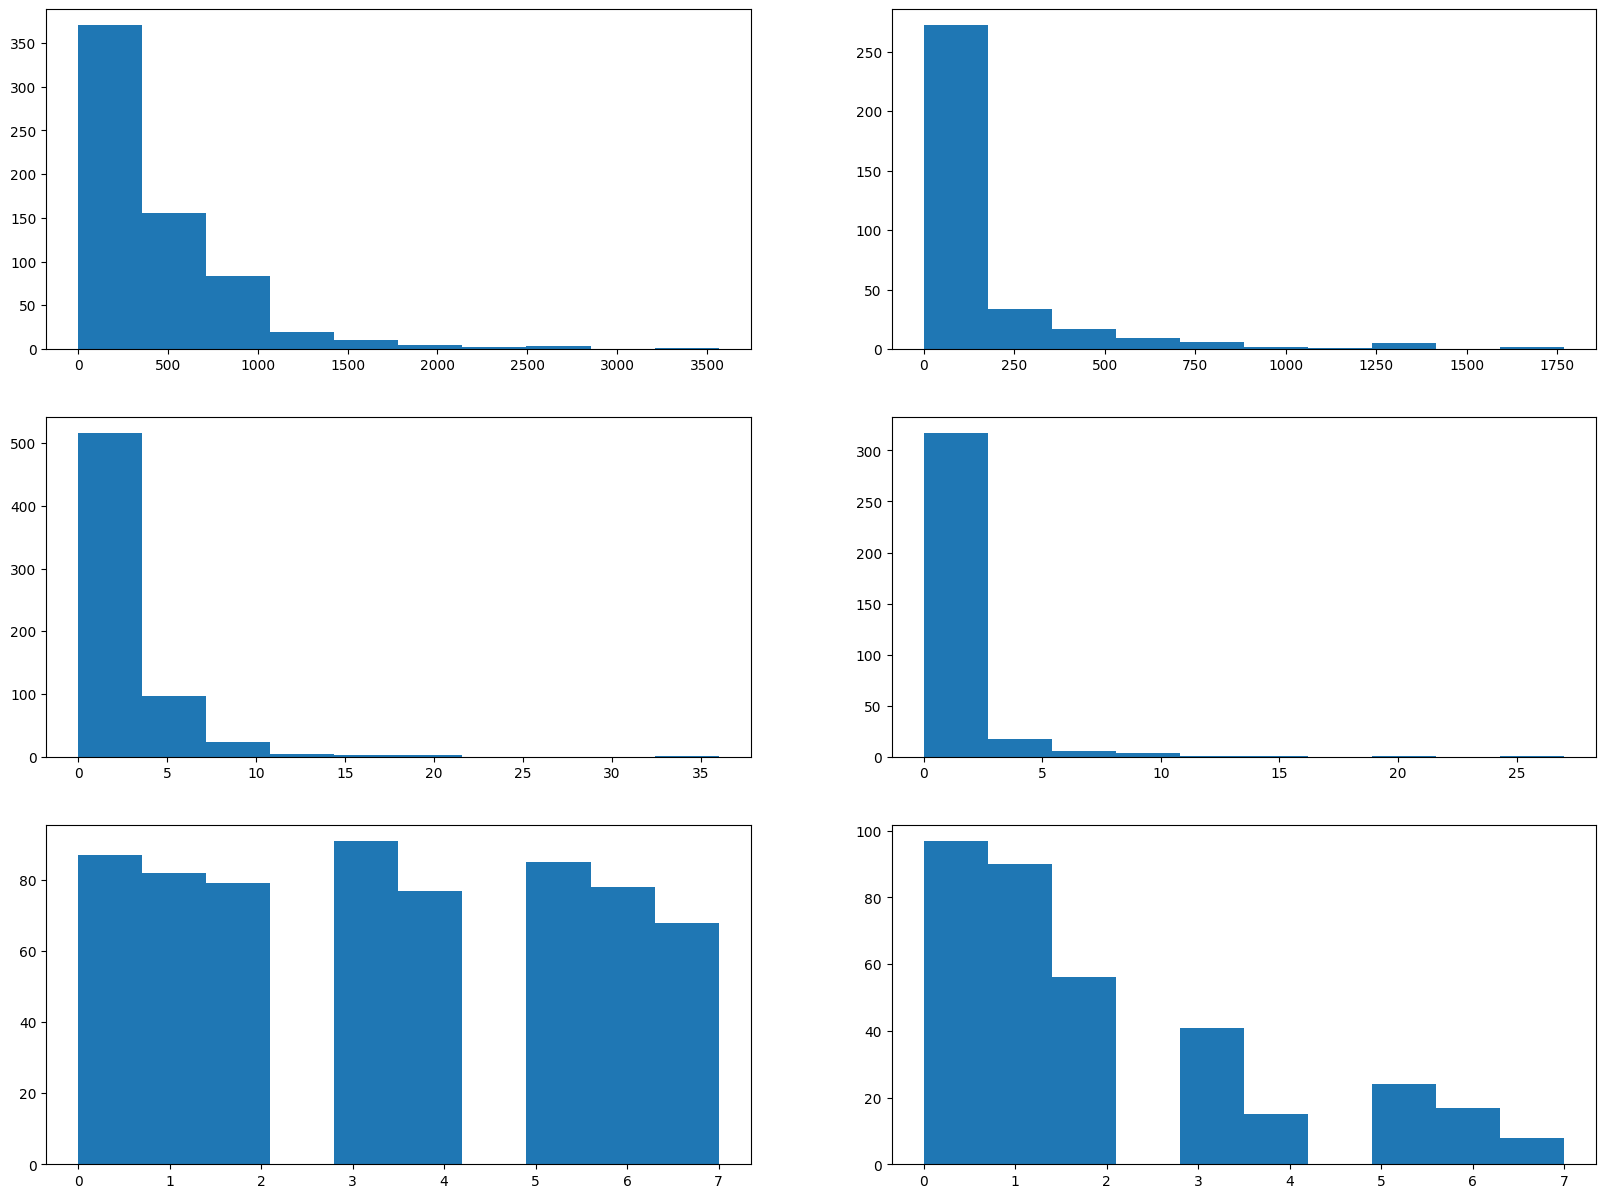

In [44]:
import matplotlib.pyplot as plt

def plot_data(engagement_by_account, interested_variable):
    total_something = {}
    for account_key, engagement_for_student in engagement_by_account.items():
        total = 0
        for engagement_record in engagement_for_student:
            total += engagement_record[interested_variable]
        total_something[account_key] = total
    total_something = list(total_something.values())
    return plt.hist(total_something) 

fig, axs = plt.subplots(ncols=2, nrows=3, figsize=(20, 15))
plt.subplot(3, 2, 1)
plot_data(dict_converter(passing_project), 'total_minutes_visited')
plt.subplot(3, 2, 2)
plot_data(dict_converter(non_pass_project), 'total_minutes_visited')
plt.subplot(3, 2, 3)
plot_data(dict_converter(passing_project), 'lessons_completed')
plt.subplot(3, 2, 4)
plot_data(dict_converter(non_pass_project), 'lessons_completed')
plt.subplot(3, 2, 5)
plot_data(dict_converter(passing_project), 'has_visited')
plt.subplot(3, 2, 6)
plot_data(dict_converter(non_pass_project), 'has_visited')

Visualizing the metrics on histograms, it's clear to see that the first and second metrics shows simmilar behaviour in both groups. 

Notice, the left side represents the pass and the right the non pass group.

In the first grade, we can notice that a few number of students spends more time or complete the lessons, because the labels are much lower as the amount of time pass in the x axis. Although, the students who passed still spends more time.

The second shows the same behaviour, the pass group contains means higher as the amount of time pass in the lessons completed variable.

The last one differs of both, because while in non pass groups the buckets of histogram goes down as the amount of time, the pass group usually visited the classrooms during 7 days.

**DRAWING CONCLUSIONS**

The next step in the analysis is drawing some conclusions or make some predictables to help the business figure out their questions. 

After the exploring phase, it seems we have the conclusion **students who pass the project's course spend more minutes in the classroom during the first week**. Although, as a data analyst I need to check if the conclusion is real or is due to problems / trash with data.

There are more factors that can be implying the correlation between visitin the classrooms and passing the projects during the first week. It would be a wrong recommendation to the client send marketing emails to all the students during the first week of assignment because students might have different levels of interests in the content, different background knowledge and might get bored of difficulties, and so on.

I would ask for a A/B test between the groups to measure their responses to kinds of communication. The A/B test might involve **measuring the responses of different student groups to various types of communication and interventions during the first week of the course.**

**COMMUNICATION PHASE**

Here I want to highlight the interesting findinds during this exploratory analysis that addres the recommendation of A/B test: groups of students and the time they spend during the first week in classroom / studying.

Text(0, 0.5, 'Frequency')

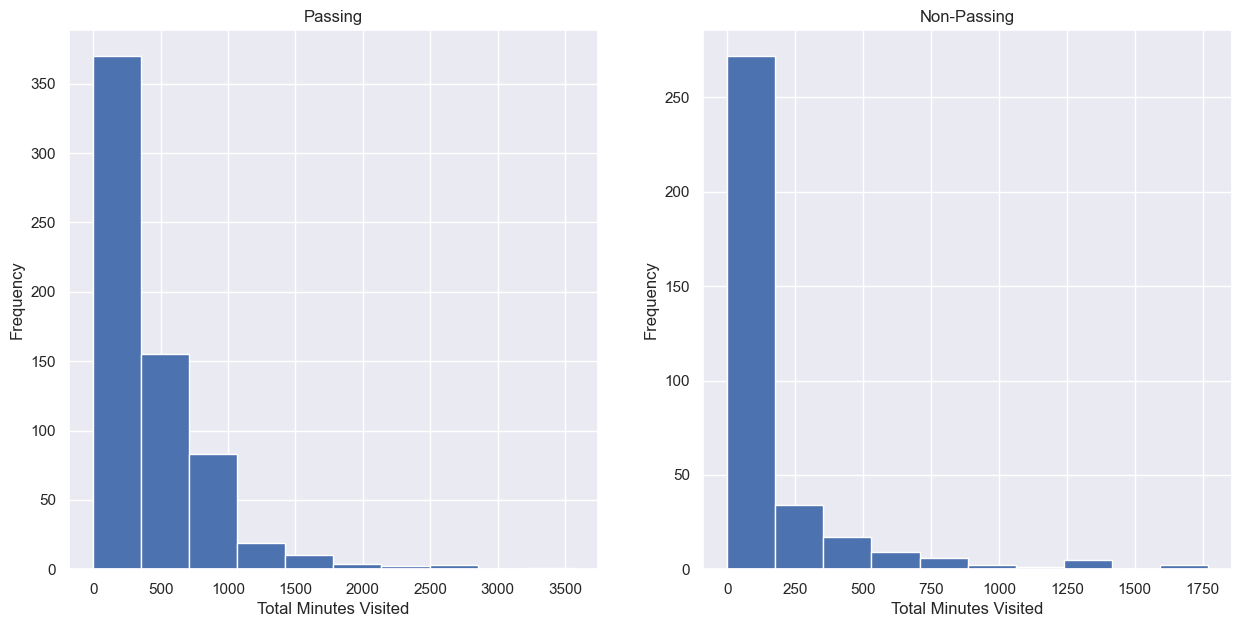

In [45]:
sns.set()
fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(15, 7))
plt.subplot(1, 2, 1)
plot_data(dict_converter(passing_project), 'total_minutes_visited')
plt.title('Passing')
plt.xlabel('Total Minutes Visited')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plot_data(dict_converter(non_pass_project), 'total_minutes_visited')
plt.title('Non-Passing')
plt.xlabel('Total Minutes Visited')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

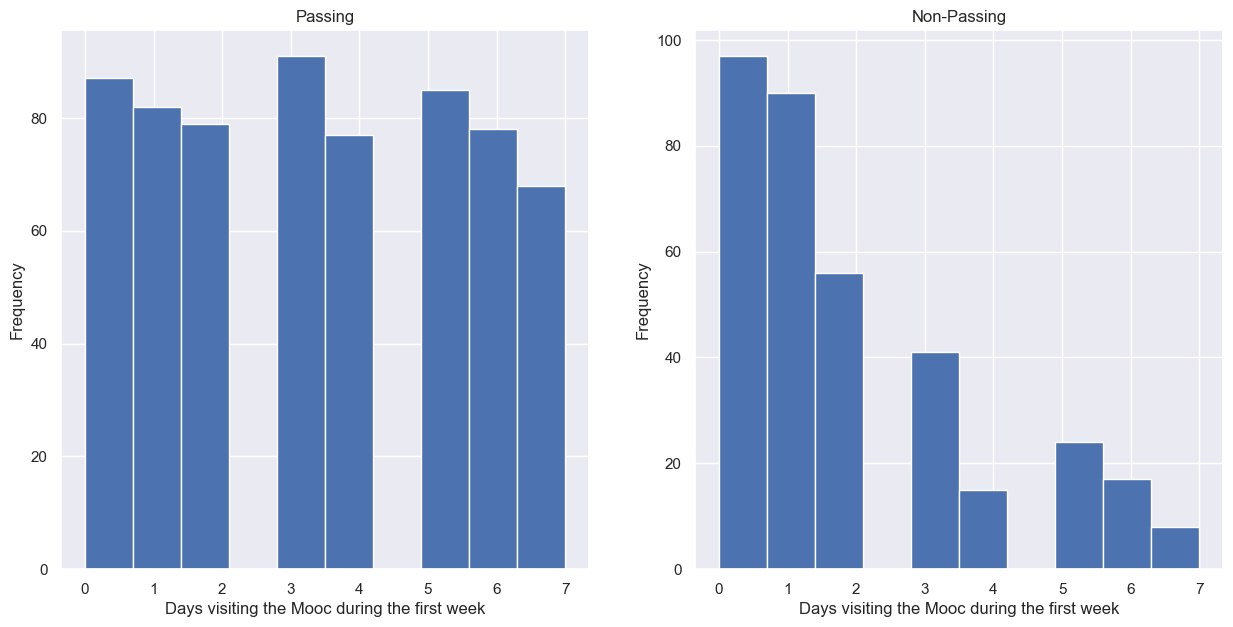

In [46]:
sns.set()
fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(15, 7))
plt.subplot(1, 2, 1)
plot_data(dict_converter(passing_project), 'has_visited')
plt.title('Passing')
plt.xlabel('Days visiting the Mooc during the first week')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plot_data(dict_converter(non_pass_project), 'has_visited')
plt.title('Non-Passing')
plt.xlabel('Days visiting the Mooc during the first week')
plt.ylabel('Frequency')